                      hpm 2.5   hpm 10    hmd  PM25 FEM
Date                                                   
2018-08-14 13:00:00      24.0     26.0  41.93      22.5
2018-08-14 14:00:00      30.0     32.0  49.33      22.7
2018-08-14 15:00:00      37.0     39.0  46.35      26.0
2018-08-14 16:00:00      57.0     59.0  53.07      33.2
2018-08-14 17:00:00      50.0     52.0  54.17      22.9


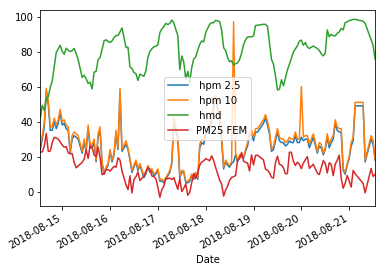

In [93]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas import DataFrame
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from datetime import datetime
import pandas as pd
from sklearn.metrics import mean_squared_error

def parser(x):
    return datetime.strptime(x[:5]+'20'+x[5:], '%m/%d/%Y %H:%M')

series = read_csv('./sensorgrid_data/purpleHourlyHumidtyHPM.csv', parse_dates=[4],  squeeze=True, date_parser=parser, index_col=4)
series = series.drop(['Timestamp',' time', ' time.1'], axis=1)
series[' hpm 2.5'] = series[' hpm 2.5'].apply(lambda x: float(x))
series[' hpm 10'] = series[' hpm 10'].apply(lambda x: float(x))
print(series.head())
series.plot()
# pyplot.title('Purple Sensor Data')
pyplot.show()

/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


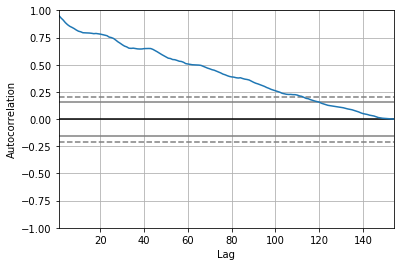

In [58]:
# Autocorrelation of series
autocorrelation_plot(series)
# pyplot.title("Autocorrelation Plot of Purple Sensor Data")
pyplot.show()

In the autocorrelation above, we can see that there is a negative correlation between the number of lags.

# Fitting each column of the data into an ARIMA model
An ARIMA model, or an Autoregressive Integrated Moving Average model, is used to fit time series data to either understand the data or predict future points in the series.

## ARIMA model summary of Purple Honeywell sensor PM 2.5 

In [77]:
model = ARIMA(series[' hpm 2.5'],order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                             ARIMA Model Results                              
Dep. Variable:             D. hpm 2.5   No. Observations:                  153
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -535.129
Method:                       css-mle   S.D. of innovations              7.988
Date:                Wed, 17 Oct 2018   AIC                           1084.259
Time:                        10:58:16   BIC                           1105.472
Sample:                    08-14-2018   HQIC                          1092.876
                         - 08-21-2018                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0347      0.381     -0.091      0.928      -0.782       0.712
ar.L1.D. hpm 2.5    -0.2513      0.081     -3.101      0.002      -0.410      -0.093
ar.L2.D. hpm 2.5    -0.1463 

/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Residual errors for HPM 2.5 ARIMA model 



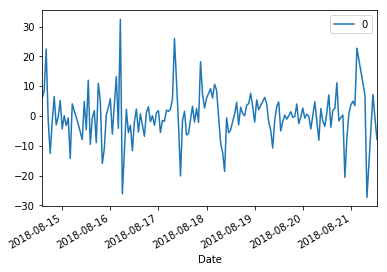

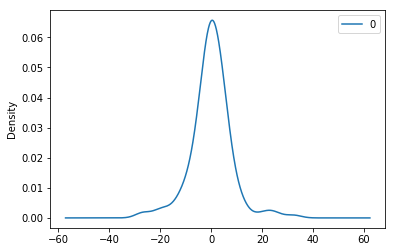

                0
count  153.000000
mean     0.060335
std      8.023432
min    -27.320148
25%     -3.104368
50%      0.074549
75%      3.740322
max     32.427016


In [78]:
# Plot residual errors
residuals = DataFrame(model_fit.resid)
print("Residual errors for HPM 2.5 ARIMA model \n")
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

## Predictions for Purple Honeywell sensor PM 2.5

In [94]:
def predict(history,test,predictions):
    for t in range(len(test)):
        model = ARIMA(history, order=(5,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
    return predictions

/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


predicted=31.473523, expected=29.000000
predicted=29.016914, expected=34.000000
predicted=32.330560, expected=34.000000
predicted=33.666232, expected=39.000000
predicted=37.842145, expected=42.000000
predicted=40.376526, expected=38.000000
predicted=38.462864, expected=33.000000
predicted=33.967187, expected=23.000000
predicted=25.866383, expected=24.000000
predicted=25.518377, expected=29.000000
predicted=29.220355, expected=34.000000
predicted=33.615300, expected=29.000000
predicted=29.243353, expected=28.000000
predicted=27.617290, expected=28.000000
predicted=27.883087, expected=26.000000
predicted=27.129295, expected=27.000000
predicted=27.114936, expected=29.000000
predicted=28.581004, expected=28.000000
predicted=28.171235, expected=28.000000
predicted=27.784010, expected=32.000000
predicted=30.832268, expected=28.000000
predicted=28.660622, expected=28.000000
predicted=28.036532, expected=31.000000
predicted=30.111000, expected=29.000000
predicted=29.621427, expected=30.000000


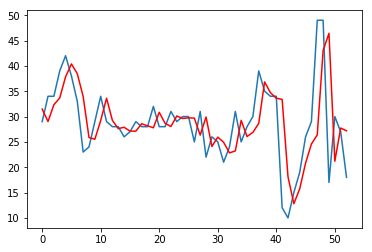

In [95]:
X = series[' hpm 2.5'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = predict(history=history,test=test,predictions=[])
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In the line plot above, the expected values appear in blue, while the rolling forecast predictions are in red.

## ARIMA model of Purple Honeywell sensor PM 10

In [79]:
model0 = ARIMA(series[' hpm 10'],order=(5,1,0))
model_fit10 = model.fit(disp=0)
print(model_fit10.summary())

/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                             ARIMA Model Results                              
Dep. Variable:              D. hpm 10   No. Observations:                  153
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -590.406
Method:                       css-mle   S.D. of innovations             11.456
Date:                Wed, 17 Oct 2018   AIC                           1194.811
Time:                        10:59:31   BIC                           1216.024
Sample:                    08-14-2018   HQIC                          1203.428
                         - 08-21-2018                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0457      0.406     -0.112      0.911      -0.842       0.750
ar.L1.D. hpm 10    -0.4775      0.080     -5.953      0.000      -0.635      -0.320
ar.L2.D. hpm 10    -0.3022      

/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Residual errors for HPM 10 ARIMA model 



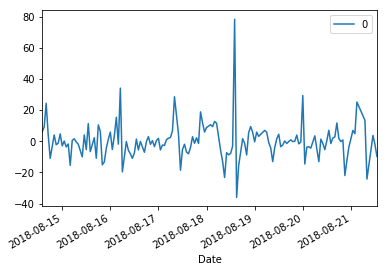

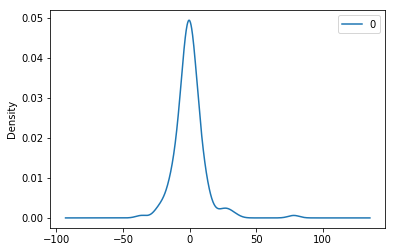

                0
count  153.000000
mean     0.099593
std     11.506102
min    -35.979195
25%     -5.200012
50%     -0.195895
75%      4.071803
max     78.364331


In [80]:
residuals10 = DataFrame(model_fit.resid)
print("Residual errors for HPM 10 ARIMA model \n")
residuals10.plot()
pyplot.show()
residuals10.plot(kind='kde')
pyplot.show()
print(residuals10.describe())

## Predictions for Purple Honeywell sensor PM 10


/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


predicted=31.180581, expected=31.000000
predicted=30.049574, expected=36.000000
predicted=32.958923, expected=36.000000
predicted=34.222678, expected=41.000000
predicted=38.002194, expected=44.000000
predicted=40.917079, expected=40.000000
predicted=39.414093, expected=35.000000
predicted=37.395990, expected=24.000000
predicted=30.514799, expected=26.000000
predicted=29.511826, expected=31.000000
predicted=31.604044, expected=36.000000
predicted=34.149641, expected=31.000000
predicted=32.127573, expected=30.000000
predicted=29.741150, expected=30.000000
predicted=29.721283, expected=28.000000
predicted=29.152560, expected=29.000000
predicted=29.955125, expected=31.000000
predicted=30.202512, expected=30.000000
predicted=29.890817, expected=30.000000
predicted=29.924913, expected=34.000000
predicted=31.711599, expected=30.000000
predicted=30.508635, expected=30.000000
predicted=30.450401, expected=60.000000
predicted=45.604251, expected=31.000000
predicted=36.331055, expected=32.000000


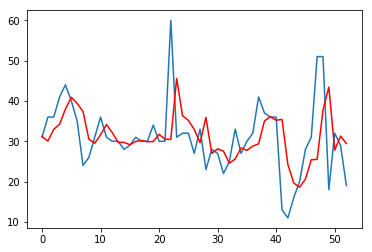

In [96]:
X = series[' hpm 10'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = predict(history=history,test=test,predictions=[])
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## ARIMA model of EPA Sensor PM 2.5

In [81]:
model_epa = ARIMA(series['PM25 FEM'],order=(5,1,0))
model_fit_epa = model_epa.fit(disp=0)
print(model_fit_epa.summary())

/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                             ARIMA Model Results                              
Dep. Variable:             D.PM25 FEM   No. Observations:                  153
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -440.033
Method:                       css-mle   S.D. of innovations              4.289
Date:                Wed, 17 Oct 2018   AIC                            894.066
Time:                        11:05:02   BIC                            915.280
Sample:                    08-14-2018   HQIC                           902.684
                         - 08-21-2018                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0950      0.228     -0.418      0.677      -0.541       0.351
ar.L1.D.PM25 FEM    -0.1493      0.080     -1.873      0.063      -0.305       0.007
ar.L2.D.PM25 FEM    -0.1785 

Residual errors for EPA PM 2.5 Model 



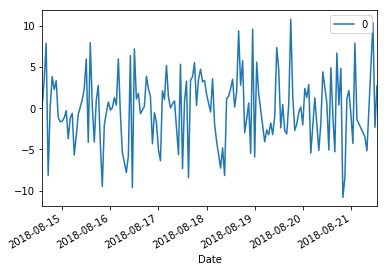

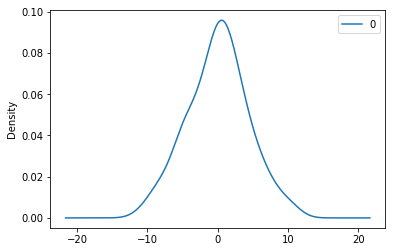

                0
count  153.000000
mean     0.014731
std      4.308821
min    -10.824241
25%     -2.719176
50%      0.295024
75%      2.753344
max     10.819982


In [83]:
residuals_epa = DataFrame(model_fit_epa.resid)
print("Residual errors for EPA PM 2.5 Model \n")
residuals_epa.plot()
pyplot.show()
residuals_epa.plot(kind='kde')
pyplot.show()
print(residuals_epa.describe())

## Predictions for EPA Sensor PM 2.5

/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


predicted=20.732764, expected=15.200000
predicted=15.835107, expected=20.600000
predicted=19.173689, expected=20.800000
predicted=21.937207, expected=18.100000
predicted=17.159505, expected=12.800000
predicted=14.470536, expected=12.200000
predicted=11.742281, expected=10.800000
predicted=10.889364, expected=8.200000
predicted=8.443180, expected=7.700000
predicted=8.238742, expected=16.500000
predicted=15.365063, expected=20.200000
predicted=19.652784, expected=15.600000
predicted=15.879962, expected=15.100000
predicted=15.624189, expected=13.600000
predicted=12.848222, expected=10.200000
predicted=9.805778, expected=10.300000
predicted=11.029068, expected=22.500000
predicted=21.278975, expected=22.400000
predicted=21.831490, expected=17.300000
predicted=17.672974, expected=14.900000
predicted=15.897335, expected=16.800000
predicted=15.003332, expected=15.600000
predicted=15.484810, expected=13.100000
predicted=13.980890, expected=16.300000
predicted=16.683399, expected=18.200000
predi

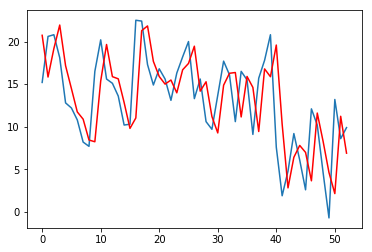

In [97]:
X = series['PM25 FEM'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = predict(history=history,test=test,predictions=[])
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()